# Breast Cancer Classification

In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torch.utils import data

In [77]:
from os import path
import pandas as pd
from collections import defaultdict
from skimage import io, transform

In [3]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import glob

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [37]:
rootdir = '/Users/yingyinxiao/breast_cancer'
path_malignant = '/data/malignant'
path_benign = '/data/benign'

### Create the CSV file
- png name with directory
- pixel numbers
- categories
- 1/0

In [82]:
os.listdir()

['untitled folder',
 '.DS_Store',
 'csv.csv',
 'Yingyin.ipynb',
 'README.md',
 '.ipynb_checkpoints',
 '.git']

In [120]:
dic4csv = defaultdict(list)

In [121]:
index = 0
for root, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".png"):
            full_path = ''
            values = root.split('/')
            ordered = [x for x in values if x]
            ordered.append(file)
            
            for i in ordered:
                full_path+='/'+i

            dic4csv[index] = [values[-2], values[-3], values[-4], values[-1], index, full_path]
            index +=1

Users⁩ ▸ ⁨yingyinxiao⁩ ▸ ⁨breast_cancer⁩ ▸ ⁨data⁩ ▸ ⁨malignant⁩ ▸ ⁨mucinous_carcinoma⁩ ▸ ⁨SOB_M_MC_14-10147⁩ ▸ ⁨100X⁩

In [123]:
csv = pd.DataFrame(data = dic4csv).transpose().rename(columns = {0: 'img_name', 1: 'category', 2: 'binary',\
                                                                 3: 'img_size', 4: 'label', 5: 'full_path'})
csv.head()

,img_name,category,binary,img_size,label,full_path
0,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,100X,0,/Users/yingyinxiao/breast_cancer/data/malignan...
1,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,400X,1,/Users/yingyinxiao/breast_cancer/data/malignan...
2,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,400X,2,/Users/yingyinxiao/breast_cancer/data/malignan...
3,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,400X,3,/Users/yingyinxiao/breast_cancer/data/malignan...
4,SOB_M_MC_14-13418DE,mucinous_carcinoma,malignant,400X,4,/Users/yingyinxiao/breast_cancer/data/malignan...


In [122]:
pd.DataFrame(data = dic4csv).transpose()[5][0]

'/Users/yingyinxiao/breast_cancer/data/malignant/mucinous_carcinoma/SOB_M_MC_14-13418DE/100X/SOB_M_MC-14-13418DE-100-002.png'

In [124]:
csv['img_name'] = csv['img_name'] +'_'+ csv['img_size']
csv['img_name']

0       SOB_M_MC_14-13418DE_100X
1       SOB_M_MC_14-13418DE_400X
2       SOB_M_MC_14-13418DE_400X
3       SOB_M_MC_14-13418DE_400X
4       SOB_M_MC_14-13418DE_400X
                  ...           
3878    SOB_B_PT_14-29315EF_200X
3879    SOB_B_PT_14-29315EF_200X
3880    SOB_B_PT_14-29315EF_200X
3881    SOB_B_PT_14-29315EF_200X
3882    SOB_B_PT_14-29315EF_200X
Name: img_name, Length: 3883, dtype: object

In [125]:
def helper(row):
    if row == 'malignant':
        return 1
    else: return 0

In [126]:
csv['binary'] = csv['binary'].apply(helper)

In [127]:
csv.binary.value_counts()

0    2490
1    1393
Name: binary, dtype: int64

In [128]:
csv.to_csv('csv.csv')

In [129]:
index == csv.shape[0]

True

### Early exploration

In [101]:
csv.describe()

,binary
count,3883.000000
mean,0.358743
std,0.479693
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [48]:
csv.groupby(['binary', 'img_size']).count()

img_name  category  label  full_path
binary    img_size                                      
benign    100X           648       648    648        648
          200X           623       623    623        623
          400X           594       594    594        594
          40X            625       625    625        625
malignant 100X           395       395    395        395
          200X           367       367    367        367
          400X           288       288    288        288
          40X            343       343    343        343

Text(0.5, 1.0, 'Bar Chart of Benign and Malignant Cases')

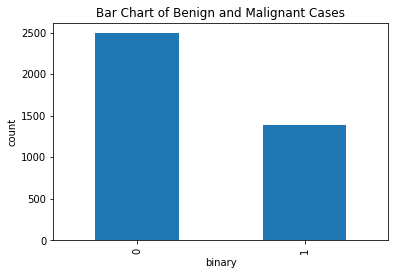

In [102]:
fig, ax = plt.subplots()    
csv.groupby('binary')['img_name'].count().plot.bar()
plt.ylabel('count')
plt.title('Bar Chart of Benign and Malignant Cases')

The binary data is obviously imbalanced, which will be adjusted later. There are more benigh than malignant images.

### Data loader

In [62]:
csv.head()

,img_name,category,img_size,binary,label,full_path
0,SOB_M_MC_14-13418DE_100X,mucinous_carcinoma,100X,1,0,/Users/yingyinxiao/breast_cancer/data/malignan...
1,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,400X,1,1,/Users/yingyinxiao/breast_cancer/data/malignan...
2,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,400X,1,2,/Users/yingyinxiao/breast_cancer/data/malignan...
3,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,400X,1,3,/Users/yingyinxiao/breast_cancer/data/malignan...
4,SOB_M_MC_14-13418DE_400X,mucinous_carcinoma,400X,1,4,/Users/yingyinxiao/breast_cancer/data/malignan...


In [103]:
labels = dict(zip(csv['img_name'], csv['label']))

In [33]:
csv_path = 'Users⁩/⁨yingyinxiao⁩/⁨breast_cancer⁩/⁨Breast-Cancer-Classification⁩/csv.csv'
root_dir = "Users/⁨yingyinxiao⁩/⁨breast_cancer⁩/data⁨"

In [133]:
class Dataset(data.Dataset):
    """
    Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    def __init__(self, csv_file, transform = None):
        'Initialization'
        self.frame = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.frame)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        img_name = self.frame.iloc[index, 6]
        image = io.imread(img_name)
        
        label = self.frame.iloc[index, 3]
        # Load data and get label
         
        sample = {'image': image, 'label': label}
        
        if self.transform:
            sample = self.transform(sample)

        return sample

### Iterate through some images

In [134]:
dataset = Dataset('csv.csv')

In [135]:
dataset.__getitem__(0)

{'image': array([[[210, 205, 212],
         [208, 203, 210],
         [210, 207, 214],
         ...,
         [233, 221, 225],
         [242, 234, 232],
         [254, 249, 246]],
 
        [[235, 232, 239],
         [234, 231, 238],
         [240, 237, 244],
         ...,
         [253, 243, 244],
         [248, 240, 238],
         [251, 246, 243]],
 
        [[255, 254, 255],
         [241, 238, 247],
         [230, 229, 237],
         ...,
         [216, 206, 207],
         [234, 225, 226],
         [253, 247, 247]],
 
        ...,
 
        [[246, 230, 240],
         [251, 238, 247],
         [248, 236, 246],
         ...,
         [226, 220, 230],
         [238, 231, 239],
         [228, 222, 224]],
 
        [[243, 225, 241],
         [255, 238, 254],
         [216, 202, 217],
         ...,
         [241, 239, 244],
         [244, 242, 245],
         [238, 232, 234]],
 
        [[244, 223, 242],
         [215, 198, 216],
         [159, 145, 162],
         ...,
         [255, 255,

0 (460, 700, 3) 1


TypeError: imshow() missing 1 required positional argument: 'X'

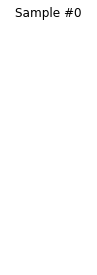

In [142]:
fig = plt.figure()

for i in range(len(dataset)):
    sample = dataset[i]

    print(i, sample['image'].shape, sample['label'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(**sample)

    if i == 3:
        plt.show()
        break